In [8]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


In [9]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [10]:
#Load the Dataset
df = pd.read_csv('Walmart_Store_sales.csv')
df.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,IsHoliday.1
0,1,5/2/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50,False
1,1,12/2/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,46039.49,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,41595.55,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,19403.54,False
4,1,5/3/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,21827.90,False


In [13]:
#Explore the Data
print(df.info())
print(df.describe())
df.isnull().sum()

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

<class 'pandas.core.frame.DataFrame'>
Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Weekly_Sales  8190 non-null   float64       
 13  IsHoliday.1   8190 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(10), int64(1)
memory usage: 847.8 KB
None
            

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values('Date')


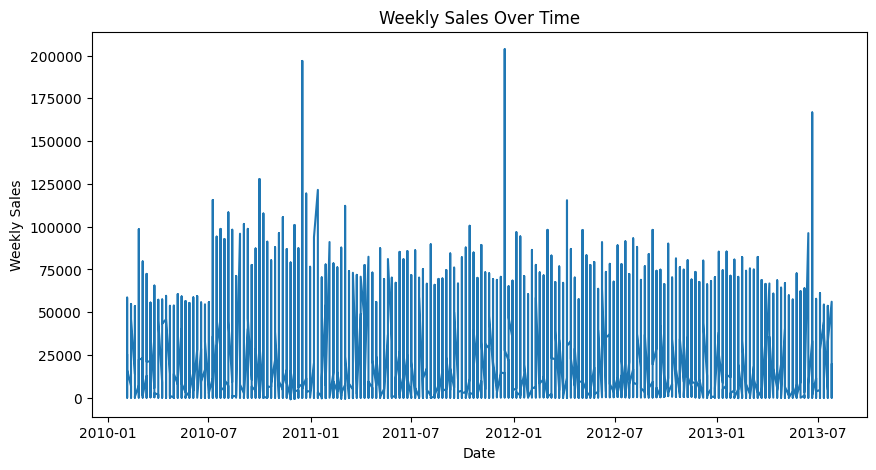

In [10]:
#Visualize sales trend over time:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


In [14]:
#Feature Engineering
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year

features = ['Month', 'Week', 'Year', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X = df[features]
y = df['Weekly_Sales']


In [15]:
#Train/Test Split (Time-Aware)
split_index = int(len(df)*0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [16]:
#Train the Model (XGBoost Regressor)
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)

model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


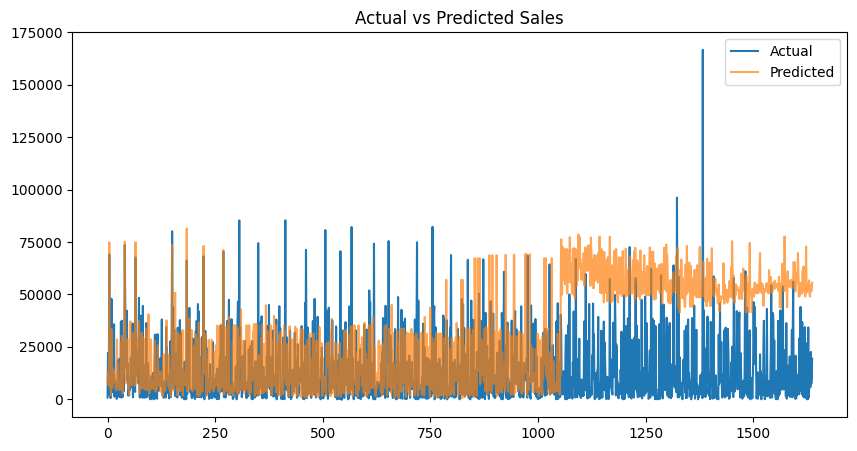

In [17]:
#Predictions
y_pred = model.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()


In [19]:
#Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 23734.53
Root Mean Squared Error: 31557.93
R² Score: -3.12


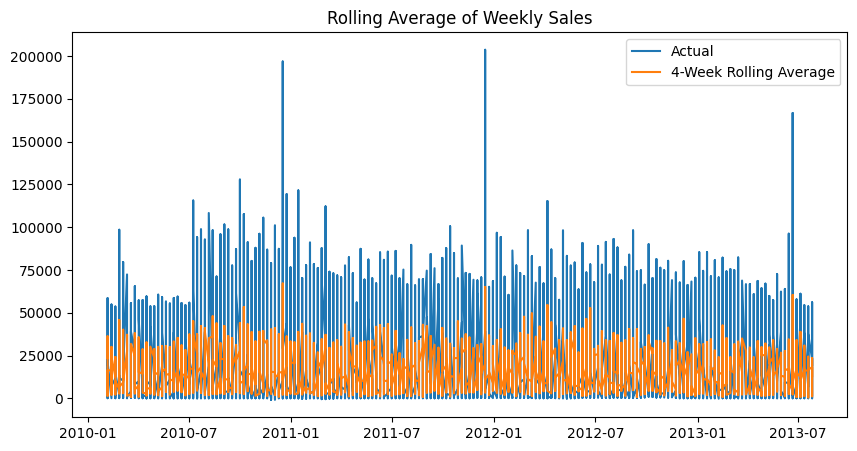

In [23]:
# Rolling averages
df['Rolling_Sales'] = df['Weekly_Sales'].rolling(window=4).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Weekly_Sales'], label='Actual')
plt.plot(df['Date'], df['Rolling_Sales'], label='4-Week Rolling Average')
plt.legend()
plt.title('Rolling Average of Weekly Sales')
plt.show()
